In [ ]:
!pip install pycaret[full]

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycaret

In [ ]:
journey_data = pd.read_csv('journey_data.csv', sep=';').drop(columns=['Unnamed: 0'])
journey_data

,elvira_id,start_ts,route,train_number,line_kind,line,journey_avg_delay,delay_cause
0,519191#967_230223,1677189220919,Boráros tér - Csepel,36H3318,HEV,NaN,0.181818,NaN
1,6476131_230906,1694002819285,Székesfehérvár - Budapest-Déli,554513,MAV,NaN,5.023256,NaN
2,6504574_230901,1693536631370,Nagykáta - Budapest-Keleti,553659,MAV,NaN,6.020000,Tartózkodási idő túllépése
3,6443830_230522,1684730578706,Szolnok - Hatvan,555727,MAV,NaN,5.322581,Biztosítóberendezési hiba miatti késés
4,6441500_230516,1684208224399,Aszód - Balassagyarmat,5533510,MAV,NaN,1.700000,NaN
...,...,...,...,...,...,...,...,...
99995,6525165_230412,1681275385110,Budapest-Keleti - Pécs,55800,MAV,NaN,4.894737,Pálya állapota miatti késés
99996,6471001_230716,1689495736876,Keszthely - Budapest-Déli,55865,MAV,NaN,13.550562,Pálya állapota miatti késés
99997,6441826_230615,1686825105052,Mátészalka - Záhony,5536824,MAV,NaN,0.102041,NaN
99998,6441652_230615,1686812031195,Békéscsaba - Mezőhegyes,5537012,MAV,NaN,0.475000,NaN


In [ ]:
journey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   elvira_id          100000 non-null  object 
 1   start_ts           100000 non-null  int64  
 2   route              100000 non-null  object 
 3   train_number       100000 non-null  object 
 4   line_kind          100000 non-null  object 
 5   line               7708 non-null    object 
 6   journey_avg_delay  99996 non-null   float64
 7   delay_cause        20557 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.1+ MB


In [ ]:
len(journey_data.route.unique())

926

In [ ]:
print(len(journey_data.elvira_id.unique()))
print(journey_data[journey_data.elvira_id.duplicated(False)].head(10))
kept_idx = journey_data.groupby('elvira_id')['journey_avg_delay'].idxmax()
journey_data = journey_data[np.isin(journey_data.index, kept_idx)]
journey_data

96789
          elvira_id       start_ts                          route  \
3    6443830_230522  1684730578706               Szolnok - Hatvan   
14   6448117_230330  1680196763608  Budapest-Keleti - Szombathely   
44   6475863_230813  1691945690331      Keszthely - Budapest-Déli   
52   6993354_231012  1697126001144           Pécs - Zalaszentiván   
62   6448593_230306  1678137077466    Budapest-Nyugati - Debrecen   
105  6476436_230716  1689528679317        Tapolca - Budapest-Déli   
106  6443529_230809  1691548100390              Győr - Celldömölk   
133  6445143_230917  1694956695127           Budapest-Déli - Győr   
134  6441586_230605  1685964933184            Békéscsaba - Szeged   
156  6441608_230629  1688050085617                 Gyoma - Vésztő   

    train_number line_kind line  journey_avg_delay  \
3         555727       MAV  NaN           5.322581   
14         55938     GYSEV  NaN           0.121212   
44         55861       MAV   26          10.000000   
52        558901  

,elvira_id,start_ts,route,train_number,line_kind,line,journey_avg_delay,delay_cause
0,519191#967_230223,1677189220919,Boráros tér - Csepel,36H3318,HEV,NaN,0.181818,NaN
1,6476131_230906,1694002819285,Székesfehérvár - Budapest-Déli,554513,MAV,NaN,5.023256,NaN
2,6504574_230901,1693536631370,Nagykáta - Budapest-Keleti,553659,MAV,NaN,6.020000,Tartózkodási idő túllépése
3,6443830_230522,1684730578706,Szolnok - Hatvan,555727,MAV,NaN,5.322581,Biztosítóberendezési hiba miatti késés
4,6441500_230516,1684208224399,Aszód - Balassagyarmat,5533510,MAV,NaN,1.700000,NaN
...,...,...,...,...,...,...,...,...
99994,6442663_230514,1684048395938,Székesfehérvár - Pusztaszabolcs,5534137,MAV,NaN,0.181818,NaN
99995,6525165_230412,1681275385110,Budapest-Keleti - Pécs,55800,MAV,NaN,4.894737,Pálya állapota miatti késés
99996,6471001_230716,1689495736876,Keszthely - Budapest-Déli,55865,MAV,NaN,13.550562,Pálya állapota miatti késés
99997,6441826_230615,1686825105052,Mátészalka - Záhony,5536824,MAV,NaN,0.102041,NaN


In [ ]:
print(len(journey_data.elvira_id.unique()), len(journey_data))

96785 96785


<Axes: ylabel='Frequency'>

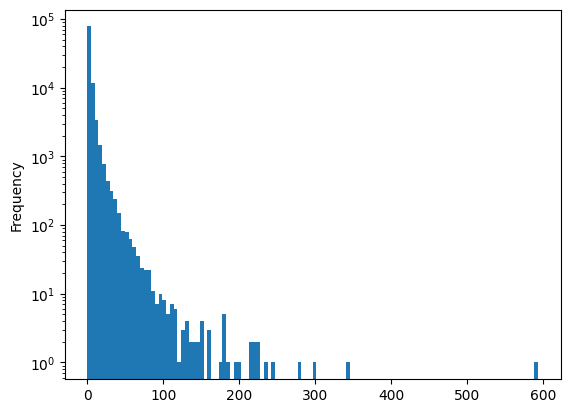

In [ ]:
model_data = journey_data.drop(columns=['elvira_id', 'line'])
model_data['journey_avg_delay'] = np.where(pd.isna(model_data['journey_avg_delay']), 0, model_data['journey_avg_delay'])
model_data['journey_avg_delay'].plot(kind='hist', bins = 120, log=True)

In [ ]:
model_data['start_ts'] = pd.to_datetime(model_data['start_ts'], unit='ms')
model_data['dow'] = model_data['start_ts'].dt.dayofweek
model_data['month'] = model_data['start_ts'].dt.month

In [ ]:
model_data

,start_ts,route,train_number,line_kind,journey_avg_delay,delay_cause,dow,month
0,2023-02-23 21:53:40.919,Boráros tér - Csepel,36H3318,HEV,0.181818,NaN,3,2
1,2023-09-06 12:20:19.285,Székesfehérvár - Budapest-Déli,554513,MAV,5.023256,NaN,2,9
2,2023-09-01 02:50:31.370,Nagykáta - Budapest-Keleti,553659,MAV,6.020000,Tartózkodási idő túllépése,4,9
3,2023-05-22 04:42:58.706,Szolnok - Hatvan,555727,MAV,5.322581,Biztosítóberendezési hiba miatti késés,0,5
4,2023-05-16 03:37:04.399,Aszód - Balassagyarmat,5533510,MAV,1.700000,NaN,1,5
...,...,...,...,...,...,...,...,...
99994,2023-05-14 07:13:15.938,Székesfehérvár - Pusztaszabolcs,5534137,MAV,0.181818,NaN,6,5
99995,2023-04-12 04:56:25.110,Budapest-Keleti - Pécs,55800,MAV,4.894737,Pálya állapota miatti késés,2,4
99996,2023-07-16 08:22:16.876,Keszthely - Budapest-Déli,55865,MAV,13.550562,Pálya állapota miatti késés,6,7
99997,2023-06-15 10:31:45.052,Mátészalka - Záhony,5536824,MAV,0.102041,NaN,3,6


,route,line_kind,delay_cause,dow,month,tn_len
0,Boráros tér - Csepel,HEV,NaN,3,2,4
1,Székesfehérvár - Budapest-Déli,MAV,NaN,2,9,4
2,Nagykáta - Budapest-Keleti,MAV,Tartózkodási idő túllépése,4,9,4
3,Szolnok - Hatvan,MAV,Biztosítóberendezési hiba miatti késés,0,5,4
4,Aszód - Balassagyarmat,MAV,NaN,1,5,5
...,...,...,...,...,...,...
99994,Székesfehérvár - Pusztaszabolcs,MAV,NaN,6,5,5
99995,Budapest-Keleti - Pécs,MAV,Pálya állapota miatti késés,2,4,3
99996,Keszthely - Budapest-Déli,MAV,Pálya állapota miatti késés,6,7,3
99997,Mátészalka - Záhony,MAV,NaN,3,6,5


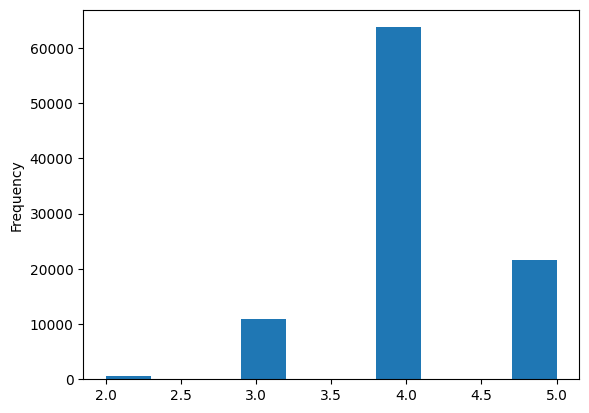

In [ ]:
# TODO check for train replacement buses (add it as input data)
multiclass_data = model_data.drop(columns=['journey_avg_delay', 'start_ts'])


multiclass_data['train_number'] = np.where(
    multiclass_data['line_kind']=='HEV',
    multiclass_data['train_number'].apply(lambda x: x[3:]),
    multiclass_data['train_number'].apply(lambda x: x[2:])
    )
multiclass_data['tn_len'] = multiclass_data.train_number.apply(len)
multiclass_data['tn_len'].plot(kind='hist')

multiclass_data = multiclass_data.drop(columns=['train_number'])
#binary_class_data.query('tn_len == 2') # international railjets/ics but probably not owned by mav?
#binary_class_data.query('tn_len == 3')# IC/IR/IEUC (Inter European Metropolitan City)
#binary_class_data.query('tn_len == 4')# mostly small trains, some IR
#binary_class_data.query('tn_len == 5')# only small trains
multiclass_data

<Axes: ylabel='Frequency'>

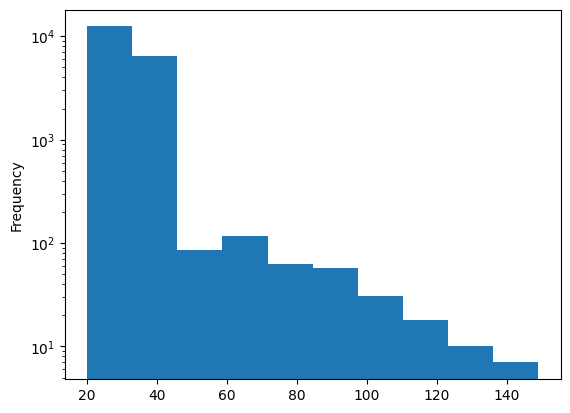

In [ ]:
multiclass_data = multiclass_data.query('~delay_cause.isnull()')
multiclass_data['delay_cause'] = multiclass_data['delay_cause'].apply(lambda x: x.split(';')[-1] if ';' in x else x)
multiclass_data['cause_len'] = multiclass_data.delay_cause.apply(len)
multiclass_data = multiclass_data.query('cause_len < 150 ')
multiclass_data['cause_len'].plot(kind='hist', log=True)

In [ ]:
val_counts = multiclass_data['delay_cause'].value_counts()
val_counts = val_counts[val_counts > 2]
sns.barplot(x=val_counts.index, y=val_counts)
val_counts

Pálya állapota miatti késés               6213
Vonat műszaki hibája miatti késés         5102
Társvasúttól átvett késés                 1644
Tartózkodási idő túllépése                1444
Csatlakozásra várás miatti késés          1144
Biztosítóberendezési hiba miatti késés    1123
Más vonat által okozott késés             1003
Baleset miatti késés                       258
Időjárási ok miatti késés                  181
Vasútüzemen kívülálló ok miatti késés      154
Pályaépítés miatti késés                   126
Felsővezetéki hiba miatti késés            118
Váltó meghibásodás miatti késés            106
Hatósági intézkedés miatti késés            92
Rongálás miatti késés                       60
Forgalmi ok miatti késés                    52
Name: delay_cause, dtype: int64

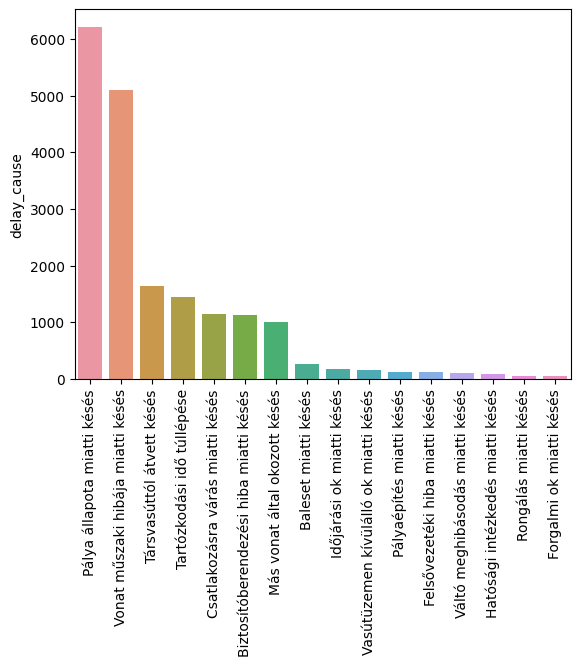

In [ ]:
val_counts = val_counts[val_counts > 50]
sns.barplot(x=val_counts.index, y=val_counts)
plt.xticks(rotation='vertical')
val_counts

In [ ]:
# save valid causes
with open('valid_causes.txt', 'w') as f:
  for cause in val_counts.index:
    # don't save track-building as it is localized and transient
    # and the model is highly likely to learn it, but it will quickly
    # be inaccurate
    if cause != 'Pályaépítés miatti késés':
      print(cause, file=f)
!cat valid_causes.txt

Pálya állapota miatti késés
Vonat műszaki hibája miatti késés
Társvasúttól átvett késés
Tartózkodási idő túllépése
Csatlakozásra várás miatti késés
Biztosítóberendezési hiba miatti késés
Más vonat által okozott késés
Baleset miatti késés
Időjárási ok miatti késés
Vasútüzemen kívülálló ok miatti késés
Felsővezetéki hiba miatti késés
Váltó meghibásodás miatti késés
Hatósági intézkedés miatti késés
Rongálás miatti késés
Forgalmi ok miatti késés


In [ ]:
valid_causes = []
with open('valid_causes.txt', 'r') as f:
  lines = f.readlines()
  valid_causes = [line.rstrip('\n') for line in lines]
print(valid_causes)

['Pálya állapota miatti késés', 'Vonat műszaki hibája miatti késés', 'Társvasúttól átvett késés', 'Tartózkodási idő túllépése', 'Csatlakozásra várás miatti késés', 'Biztosítóberendezési hiba miatti késés', 'Más vonat által okozott késés', 'Baleset miatti késés', 'Időjárási ok miatti késés', 'Vasútüzemen kívülálló ok miatti késés', 'Felsővezetéki hiba miatti késés', 'Váltó meghibásodás miatti késés', 'Hatósági intézkedés miatti késés', 'Rongálás miatti késés', 'Forgalmi ok miatti késés']


In [ ]:
# most delay causes are too infequent, only use ones with more than 1000 cases
valid_causes = val_counts[val_counts > 1000].index
valid_causes

Index(['Pálya állapota miatti késés', 'Vonat műszaki hibája miatti késés',
       'Társvasúttól átvett késés', 'Tartózkodási idő túllépése',
       'Csatlakozásra várás miatti késés',
       'Biztosítóberendezési hiba miatti késés',
       'Más vonat által okozott késés'],
      dtype='object')

The causes: 'Pálya állapota miatti késés', 'Vonat műszaki hibája miatti késés', are the most dominant by far, we undersample them to balance the data a bit.

In [ ]:
multiclass_data_track_state_cause = multiclass_data.query('delay_cause == "Pálya állapota miatti késés"')
multiclass_data_track_state_cause = multiclass_data_track_state_cause.sample(n=2000, random_state=123)
multiclass_data_track_state_cause

,route,line_kind,delay_cause,dow,month,tn_len,cause_len
19715,Budapest-Keleti - Kosice,MAV,Pálya állapota miatti késés,0,2,3,27
6318,Békéscsaba - Szeged,MAV,Pálya állapota miatti késés,2,8,4,27
94839,Mezőhegyes - Mezőtúr,MAV,Pálya állapota miatti késés,5,5,5,27
46960,Budapest-Keleti - Eger,MAV,Pálya állapota miatti késés,1,5,3,27
22523,Monor - Budapest-Nyugati,MAV,Pálya állapota miatti késés,6,6,4,27
...,...,...,...,...,...,...,...
55320,Záhony - Mátészalka,MAV,Pálya állapota miatti késés,1,9,5,27
8707,Esztergom - Budapest-Nyugati,MAV,Pálya állapota miatti késés,2,5,4,27
28106,Záhony - Budapest-Nyugati,MAV,Pálya állapota miatti késés,5,7,3,27
56268,Szeged - Budapest-Nyugati,MAV,Pálya állapota miatti késés,6,7,3,27


In [ ]:
multiclass_data_train_err_cause = multiclass_data.query('delay_cause == "Vonat műszaki hibája miatti késés"')
multiclass_data_train_err_cause = multiclass_data_train_err_cause.sample(n=1800, random_state=123)
multiclass_data_train_err_cause

,route,line_kind,delay_cause,dow,month,tn_len,cause_len
89137,Vác - Budapest-Nyugati,MAV,Vonat műszaki hibája miatti késés,3,10,4,33
14602,Székesfehérvár - Baja,MAV,Vonat műszaki hibája miatti késés,6,3,4,33
98393,Budapest-Déli - Keszthely,MAV,Vonat műszaki hibája miatti késés,3,7,3,33
45927,Szeged - Budapest-Nyugati,MAV,Vonat műszaki hibája miatti késés,6,9,3,33
28199,Vásárosnamény - Nyíregyháza,MAV,Vonat műszaki hibája miatti késés,5,7,5,33
...,...,...,...,...,...,...,...
87276,Balatonfüred - Budapest-Déli,MAV,Vonat műszaki hibája miatti késés,4,8,5,33
1283,Budapest-Déli - Győr,MAV,Vonat műszaki hibája miatti késés,0,4,4,33
74813,Szombathely - Pécs,MAV,Vonat műszaki hibája miatti késés,4,6,4,33
74741,Budapest-Nyugati - Vác,MAV,Vonat műszaki hibája miatti késés,0,6,4,33


In [ ]:
multiclass_data_undersampled = multiclass_data.query('delay_cause != "Pálya állapota miatti késés"')
multiclass_data_undersampled = multiclass_data_undersampled.query('delay_cause != "Vonat műszaki hibája miatti késés"')
multiclass_data_undersampled = pd.concat([
    multiclass_data_undersampled,
    multiclass_data_train_err_cause,
    multiclass_data_track_state_cause
    ]).sample(frac=1, random_state=123)
multiclass_data_undersampled

,route,line_kind,delay_cause,dow,month,tn_len,cause_len
31011,Balatonszentgyörgy - Szeged,MAV,Biztosítóberendezési hiba miatti késés,6,6,4,38
32206,Dombóvár - Pusztaszabolcs,MAV,Csatlakozásra várás miatti késés,3,3,4,32
65746,Szeged - Budapest-Nyugati,MAV,Biztosítóberendezési hiba miatti késés,4,8,3,38
27966,Szombathely - Pécs,MAV,Csatlakozásra várás miatti késés,5,6,4,32
65317,Mezőtúr - Orosháza,MAV,Biztosítóberendezési hiba miatti késés,2,2,5,38
...,...,...,...,...,...,...,...
97329,Budapest-Keleti - Gödöllő,MAV,Váltó meghibásodás miatti késés,1,3,4,31
63861,Pécs - Budapest-Keleti,MAV,Tartózkodási idő túllépése,6,6,3,26
15673,Szombathely - Celldömölk,MAV,Társvasúttól átvett késés,1,6,4,25
91174,Nagykanizsa - Pécs,MAV,Pálya állapota miatti késés,6,4,4,27


The training data delay cause frequency distribution can be seen below. Pálya állapota miatti késés, Vonat műszaki hibája miatti késés, are kept a bit more dominant on purpose.

Pálya állapota miatti késés               2000
Vonat műszaki hibája miatti késés         1800
Társvasúttól átvett késés                 1644
Tartózkodási idő túllépése                1444
Csatlakozásra várás miatti késés          1144
Biztosítóberendezési hiba miatti késés    1123
Más vonat által okozott késés             1003
Name: delay_cause, dtype: int64

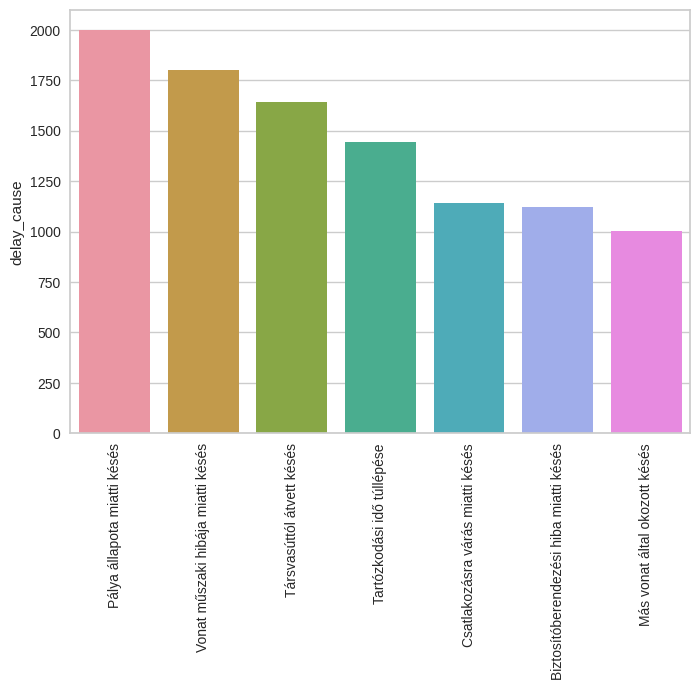

In [39]:
undersample_vc = multiclass_data_undersampled['delay_cause'].value_counts()
undersample_vc = undersample_vc[undersample_vc > 1000]
sns.barplot(x=undersample_vc.index, y=undersample_vc)
plt.xticks(rotation='vertical')
undersample_vc

In [42]:
multiclass_data_undersampled = multiclass_data_undersampled[np.isin(multiclass_data_undersampled['delay_cause'], undersample_vc.index)]
multiclass_data_undersampled = multiclass_data_undersampled.drop(columns=['cause_len'])
multiclass_data_undersampled

,route,line_kind,delay_cause,dow,month,tn_len
31011,Balatonszentgyörgy - Szeged,MAV,Biztosítóberendezési hiba miatti késés,6,6,4
32206,Dombóvár - Pusztaszabolcs,MAV,Csatlakozásra várás miatti késés,3,3,4
65746,Szeged - Budapest-Nyugati,MAV,Biztosítóberendezési hiba miatti késés,4,8,3
27966,Szombathely - Pécs,MAV,Csatlakozásra várás miatti késés,5,6,4
65317,Mezőtúr - Orosháza,MAV,Biztosítóberendezési hiba miatti késés,2,2,5
...,...,...,...,...,...,...
33098,Eger - Budapest-Keleti,MAV,Pálya állapota miatti késés,6,6,3
63861,Pécs - Budapest-Keleti,MAV,Tartózkodási idő túllépése,6,6,3
15673,Szombathely - Celldömölk,MAV,Társvasúttól átvett késés,1,6,4
91174,Nagykanizsa - Pécs,MAV,Pálya állapota miatti késés,6,4,4


In [41]:
import pycaret.classification as pc
s = pc.setup(
    multiclass_data_undersampled,
    target='delay_cause',
    session_id=123,
    categorical_features=['tn_len', 'route', 'line_kind'],
    max_encoding_ohe=1000,
    use_gpu=False,
    )
s

,Description,Value
0,Session id,123
1,Target,delay_cause
2,Target type,Multiclass
3,Target mapping,"Biztosítóberendezési hiba miatti késés: 0, Csatlakozásra várás miatti késés: 1, Más vonat által okozott késés: 2, Pálya állapota miatti késés: 3, Tartózkodási idő túllépése: 4, Társvasúttól átvett késés: 5, Vonat műszaki hibája miatti késés: 6"
4,Original data shape,"(10158, 6)"
5,Transformed data shape,"(10158, 576)"
6,Transformed train set shape,"(7110, 576)"
7,Transformed test set shape,"(3048, 576)"
8,Ordinal features,1
9,Numeric features,2


In [ ]:
best = pc.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.3605,0.7075,0.3605,0.3400,0.3389,0.2371,0.2397,19.1860
ridge,Ridge Classifier,0.3598,0.0000,0.3598,0.3377,0.3379,0.2375,0.2401,0.9850
xgboost,Extreme Gradient Boosting,0.3373,0.6884,0.3373,0.3251,0.3199,0.2073,0.2102,3.0100
lda,Linear Discriminant Analysis,0.3070,0.6215,0.3070,0.3093,0.3050,0.2007,0.2015,2.2540
mlp,MLP Classifier,0.3004,0.6628,0.3004,0.2989,0.2979,0.1738,0.1742,107.0940
rf,Random Forest Classifier,0.3000,0.6602,0.3000,0.2961,0.2970,0.1722,0.1724,4.6800
ada,Ada Boost Classifier,0.2783,0.6123,0.2783,0.2481,0.2367,0.1229,0.1334,2.0430
dt,Decision Tree Classifier,0.2695,0.5779,0.2695,0.2781,0.2722,0.1389,0.1392,1.1470
nb,Naive Bayes,0.2533,0.6565,0.2533,0.3066,0.1862,0.1303,0.1460,0.6910
knn,K Neighbors Classifier,0.2360,0.5961,0.2360,0.2432,0.2369,0.1032,0.1036,1.1770


Processing:   0%|          | 0/49 [00:00<?, ?it/s]

In [43]:
best = pc.create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3938,0.7237,0.3938,0.3692,0.3704,0.2770,0.2797
1,0.3558,0.6876,0.3558,0.3392,0.3357,0.2312,0.2338
2,0.3558,0.7165,0.3558,0.3356,0.3337,0.2306,0.2333
3,0.3685,0.7199,0.3685,0.3465,0.3478,0.2483,0.2504
4,0.3671,0.7220,0.3671,0.3471,0.3411,0.2442,0.2475
5,0.3586,0.6996,0.3586,0.3416,0.3409,0.2370,0.2390
6,0.3783,0.7174,0.3783,0.3615,0.3557,0.2577,0.2614
7,0.3418,0.6956,0.3418,0.3227,0.3224,0.2149,0.2170
8,0.3544,0.7034,0.3544,0.3298,0.3310,0.2294,0.2320


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [44]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

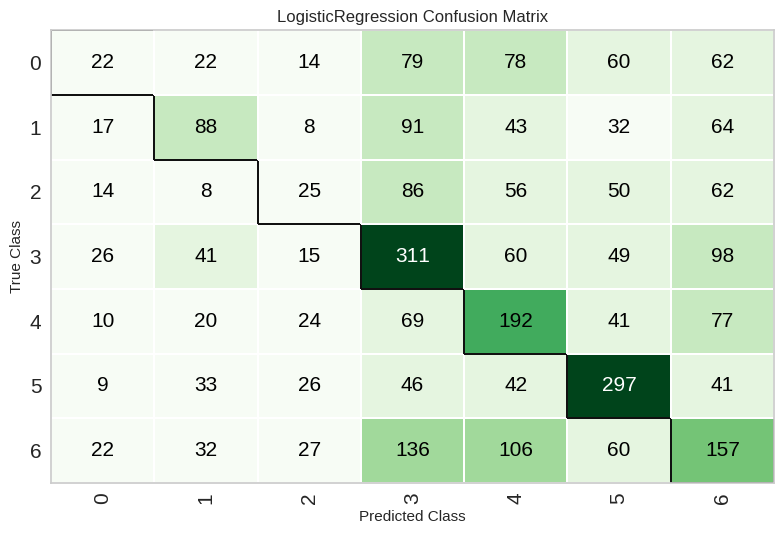

In [53]:
pc.plot_model(best, plot = 'confusion_matrix')

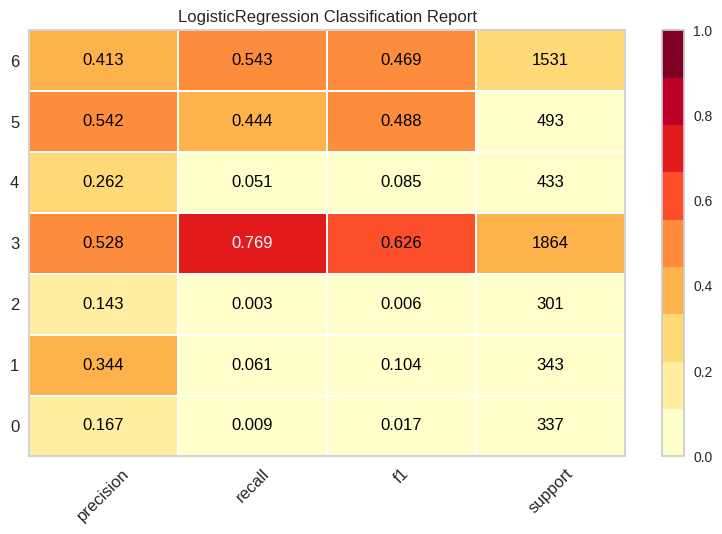

In [ ]:
pc.plot_model(best, plot = 'class_report')

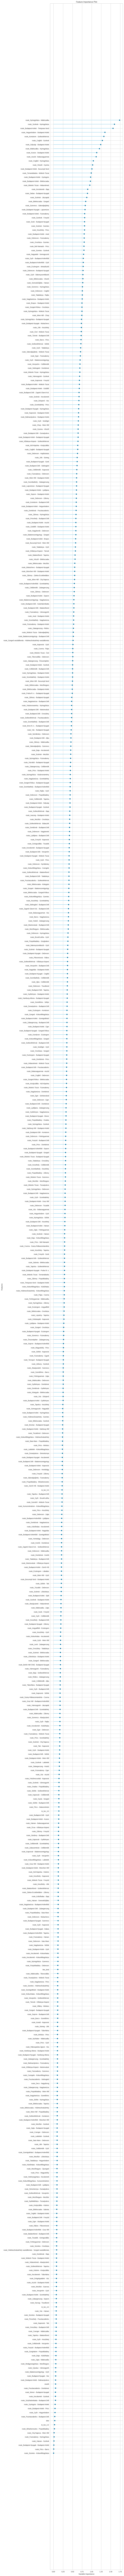

In [52]:
pc.plot_model(best, plot = 'feature_all')

In [47]:
pc.save_model(best, 'lr_cause_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['dow', 'month'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy...
                                                               handle_missing='return_nan',
                                                               handle_unknow